# Clase 20: Regresiones
En esta clase revisaremos los conceptos econométricos de Mínimos Cuadrados Ordinarios (OLS por sus siglas en inglés) y Modelo Autorregresivo (AR por sus siglas en inglés).

Para esto vamos a utilizar la librería `statsmodels`: https://www.statsmodels.org/stable/install.html

## Mínimos Cuadrados Ordinarios (Ordinary Least Squares)

Buscamos estimar la Función de Regresión Poblacional (FRP), sin embargo esta no es observable directamente. Para esto vamos a utilizar una estimación que llamaremos la Función de Regresión Muestral (FRM): 
- FRP: $Y_i = \beta_1 + \beta_2 X_i + \mu_i$
- FRM: $Y_i = \hat{\beta}_1 + \hat{\beta}_2 X_i + \hat{\mu}_i = \hat{Y}_i - \hat{\mu}_i$, donde $\hat{Y}_i$ es el valor estimado (media condicional) de $Y_i$. 

Entonces, en OLS vamos a minimizar el error $\hat{\mu}_i = Y_i - \hat{Y_i}$
$$\begin{align}
\sum u_i^2 &= \sum (Y_i-\hat{Y}_i)^2 \\
 &= \sum (Y_i - \hat{\beta}_1 - \hat{\beta}_2 X_i)^2
\end{align}$$

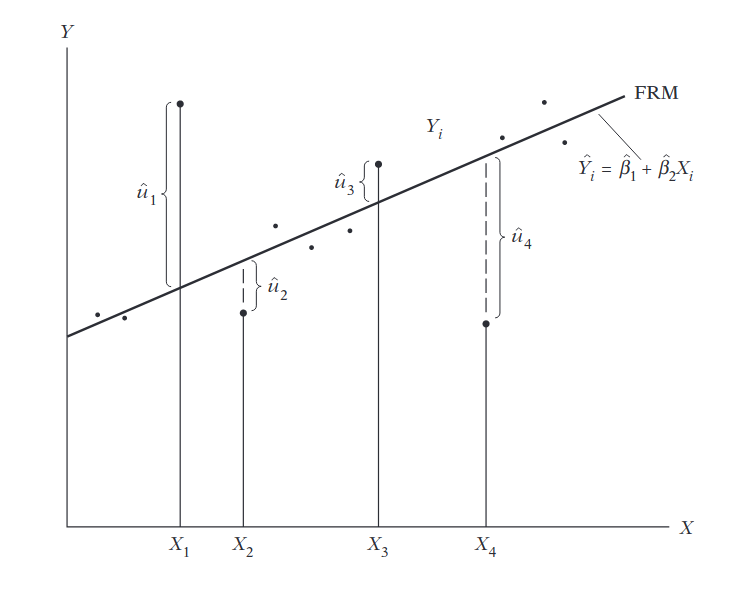

In [91]:
from IPython.display import Image
Image("OLS1.png")

In [13]:
import pandas as pd
import numpy as np
df = pd.read_stata("/home/felix/Dropbox/Computational_Economics/Intro_python/Data_OLS_AR/Casen2020.dta");

/home/felix/miniconda3/lib/python3.9/site-packages/pandas/io/stata.py:1417: UnicodeWarning: 
One or more strings in the dta file could not be decoded using utf-8, and
so the fallback encoding of latin-1 is being used.  This can happen when a file
has been incorrectly encoded by Stata or some other software. You should verify
the string values returned are correct.
  warnings.warn(msg, UnicodeWarning)


In [14]:
detalle_ingreso = df.ytrabajocor.describe()
detalle_ingreso

count    7.350900e+04
mean     5.783447e+05
std      1.264676e+06
min      4.000000e+00
25%      2.000000e+05
50%      3.681670e+05
75%      6.500000e+05
max      2.250000e+08
Name: ytrabajocor, dtype: float64

In [3]:
df2 = df[(df.ytrabajocor>0) & (df.ytrabajocor<10_000_000) & (df.ytrabajocor.notna())]
df2.ytrabajocor.describe()

count    7.345000e+04
mean     5.617230e+05
std      6.973099e+05
min      4.000000e+00
25%      2.000000e+05
50%      3.674275e+05
75%      6.500000e+05
max      9.850000e+06
Name: ytrabajocor, dtype: float64

Text(0, 0.5, 'Ingreso del trabajo')

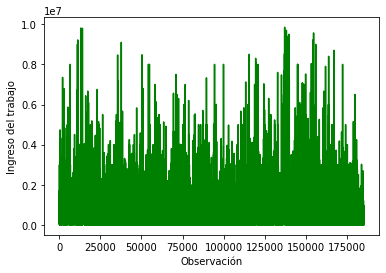

In [54]:
plt.plot(df2.ytrabajocor, 'g')
plt.xlabel("Observación")
plt.ylabel('Ingreso del trabajo')

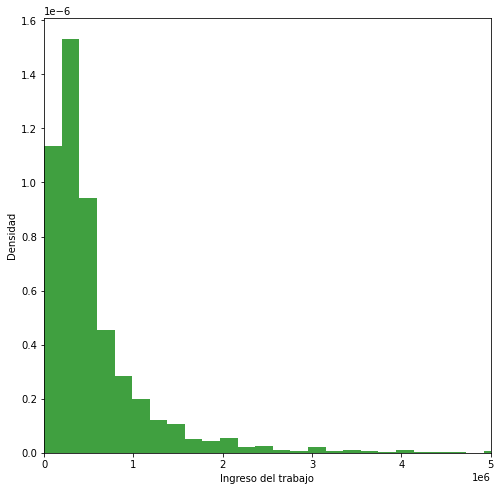

In [70]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8, 8))
plt.hist(df2.ytrabajocor, 50, density=True, facecolor='g', alpha=0.75)
plt.xlim([0, 5_000_000])
plt.xlabel('Ingreso del trabajo')
plt.ylabel('Densidad')
plt.show()

In [65]:
y_educ_bas = df2[["ytrabajocor", "educ"]][df2.educ=="Básica incompleta"].ytrabajocor
y_educ_uni = df2[["ytrabajocor", "educ"]][df2.educ=="Profesional completo"].ytrabajocor

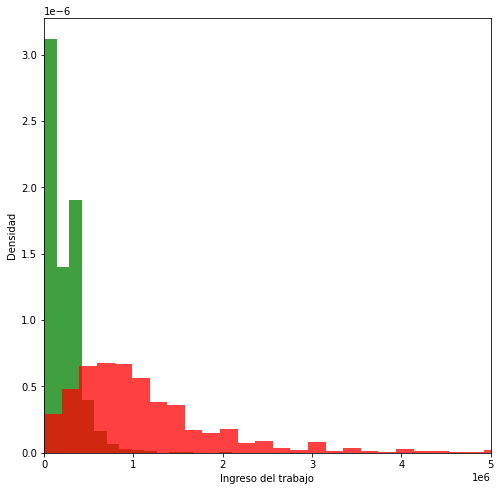

In [71]:
fig = plt.figure(figsize=(8, 8))
plt.hist(y_educ_bas, 50, density=True, facecolor='g', alpha=0.75)
plt.hist(y_educ_uni, 50, density=True, facecolor='r', alpha=0.75)
plt.xlim([0, 5_000_000])
plt.xlabel('Ingreso del trabajo')
plt.ylabel('Densidad')
plt.show()

Datos para la regresión

In [80]:
y = df2.ytrabajocor
X = df2.esc
X = sm.add_constant(X)

In [82]:
X.head()

,const,esc
0,1.0,12.0
3,1.0,15.0
4,1.0,NaN
5,1.0,16.0
7,1.0,15.0


In [15]:
#Hay que limpiar los NaN en variable exógena
df3 = df[(df.ytrabajocor>0) & (df.ytrabajocor<10_000_000) & (df.ytrabajocor.notna()) & (df.esc.notna())]

<ipython-input-6-4d084c745955>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['exp'] = df3.edad-df3.esc


In [16]:
y = df3.ytrabajocor
X = df3.esc
X = sm.add_constant(X)
X.head()

,const,esc
0,1.0,12.0
3,1.0,15.0
5,1.0,16.0
7,1.0,15.0
11,1.0,14.0


In [ ]:
y = df3.ytrabajocor
X = df3.esc
X = sm.add_constant(X)
X.head()

In [10]:
import statsmodels.api as sm

In [89]:
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            ytrabajocor   R-squared:                       0.183
Model:                            OLS   Adj. R-squared:                  0.183
Method:                 Least Squares   F-statistic:                 1.601e+04
Date:                Mon, 26 Jul 2021   Prob (F-statistic):               0.00
Time:                        22:21:34   Log-Likelihood:            -1.0554e+06
No. Observations:               71466   AIC:                         2.111e+06
Df Residuals:                   71464   BIC:                         2.111e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.694e+05   7751.498    -47.662      0.0

- No. Observations: número de observaciones ocupadas en la regresión. 
- R-squared: El $R^2$ es la proporción de la varianza en la variable dependiente que puede ser predicha por las variables independientes. En este caso un 18% de la varianza es explicada por las variables independientes. 
- Adj R-squared ($R^2$ ajustado): el $R^2$ se ajusta para penalizar que se agreguen regresores extraños. 
- F-statistic (F(Z,)): Es la razón entre el error cuadrático medio del modelo y el error cuadrático medio de los residuos. Nos sirve para determinar la importancia general del modelo. 
- Criterios de información (AIC y BIC): nos sirven para ver el trade-off entre complejidad del modelo y bondad de ajuste de este. 

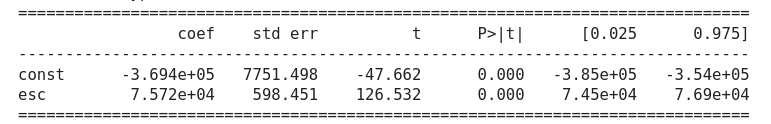

In [94]:
Image("OLS3.png")

En las filas están las variables con las que regresionamos: constante y educación. En las columnas tenemos: 
- El coeficiente de las variables independientes y la constante. Acá estamos estimando los $\beta_i$:  $Y_i = \hat{\beta}_1 + \hat{\beta}_2 X_i + \hat{\mu}_i$ 
- std err: error estándar asociado a los coeficientes.
- t: estadístico t usado para testear la significancia de los coeficientes. 
- $P>|t|$: p-value de dos colas usado para testear hipótesis nula de que el coeficiente es cero ($\alpha=0.05$).
- [0.025 - 0.975]: intervalo de confianza de coeficiente con $\alpha=0.05$.

In [17]:
#df.loc[df['column name'] condition, 'new column name'] = 'value if condition is met'

df3.loc[df3.sexo=="Hombre", "sexo2"] = 0
df3.loc[df3.sexo=="Mujer", "sexo2"] = 1

/home/felix/miniconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/home/felix/miniconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [148]:
y = df3.ytrabajocor
X = df3[["esc", "edad", "sexo2"]]
X = sm.add_constant(X)
X.head()

,const,esc,edad,sexo2,esc2
0,1.0,12.0,34,1.0,144.0
3,1.0,15.0,45,0.0,225.0
5,1.0,16.0,57,0.0,256.0
7,1.0,15.0,56,1.0,225.0
11,1.0,14.0,54,1.0,196.0


In [18]:
df3['exp'] = df3.edad-df3.esc
df3['exp2'] = df3.exp**2
df3['exp_sexo'] = df3.exp*df3.sexo2
y = np.log(df3.ytrabajocor)
X = df3[["esc", "exp", "exp2", "sexo2", "exp_sexo"]]
X = sm.add_constant(X)
X.head()

<ipython-input-18-79fecfcd28f3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['exp'] = df3.edad-df3.esc
<ipython-input-18-79fecfcd28f3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['exp2'] = df3.exp**2
<ipython-input-18-79fecfcd28f3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

,const,esc,exp,exp2,sexo2,exp_sexo
0,1.0,12.0,22.0,484.0,1.0,22.0
3,1.0,15.0,30.0,900.0,0.0,0.0
5,1.0,16.0,41.0,1681.0,0.0,0.0
7,1.0,15.0,41.0,1681.0,1.0,41.0
11,1.0,14.0,40.0,1600.0,1.0,40.0


In [19]:
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            ytrabajocor   R-squared:                       0.265
Model:                            OLS   Adj. R-squared:                  0.265
Method:                 Least Squares   F-statistic:                     5151.
Date:                Tue, 26 Oct 2021   Prob (F-statistic):               0.00
Time:                        11:08:12   Log-Likelihood:            -1.1887e+05
No. Observations:               71466   AIC:                         2.378e+05
Df Residuals:                   71460   BIC:                         2.378e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.7314      0.030    326.486      0.0

In [190]:
y = np.log(df3.ytrabajocor)
X = df3[["esc", "edad", "sexo2"]]
X = sm.add_constant(X)
X.head()

,const,esc,edad,sexo2
0,1.0,12.0,34,1.0
3,1.0,15.0,45,0.0
5,1.0,16.0,57,0.0
7,1.0,15.0,56,1.0
11,1.0,14.0,54,1.0


In [191]:
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            ytrabajocor   R-squared:                       0.212
Model:                            OLS   Adj. R-squared:                  0.212
Method:                 Least Squares   F-statistic:                     6423.
Date:                Mon, 26 Jul 2021   Prob (F-statistic):               0.00
Time:                        23:38:58   Log-Likelihood:            -1.2134e+05
No. Observations:               71466   AIC:                         2.427e+05
Df Residuals:                   71462   BIC:                         2.427e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.5982      0.028    380.688      0.0

In [120]:
print('Parámetros: ', results.params)
print('Error estandar: ', results.bse)
print('Valores predichos: ', results.predict())

Parámetros:  const    10.598153
esc       0.169602
edad      0.003898
sexo2    -0.578690
dtype: float64
Error estandar:  const    0.027839
esc      0.001357
edad     0.000368
sexo2    0.009947
dtype: float64
Valores predichos:  [12.18721169 13.31758263 13.5339568  ... 12.31583427 10.77744552
 11.22416493]


Comparar resultados predichos

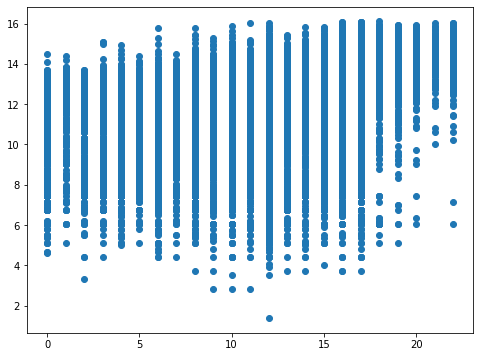

In [194]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std

prstd, iv_l, iv_u = wls_prediction_std(results)

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(X.esc, y, 'o', label="data")

Para ver ejemplos de gráficos en modelos de regresión pueden utilizar https://www.statsmodels.org/stable/examples/notebooks/generated/regression_plots.html

Por ejemplo, una visualización de las regresiones parciales se puede obtener mediante `plot_partregress_grid`. Esto muestra la relación entre la respuesta y la variable explicativa después de eliminar el efecto de todas las otras variables exógenas. 

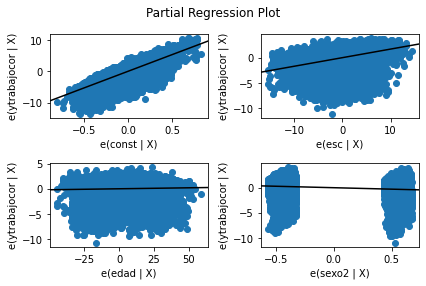

In [192]:
#Para ver gráficos de las regresiones parciales (regresionar la variable dependiente c/r a una variable condicional en el resto de las variables exógenas)
fig = sm.graphics.plot_partregress_grid(results)
fig.tight_layout(pad=1.0)

Para ver información de la regresión con respecto a una variable en específico podemos ocupar `plot_regress_exog`. Acá tenemos
- Fitted plot
- Residuo
- Regresión parcial
- Component-Component plus Residual (CCPR) plot: nos sirve para ver la relación entre uan variable independiente particular y la variable de respuesta, dado que otras variables indpendientes también están presentes en el modelo: $Res+\hat{\beta}_iX_i$ versus $X_i$

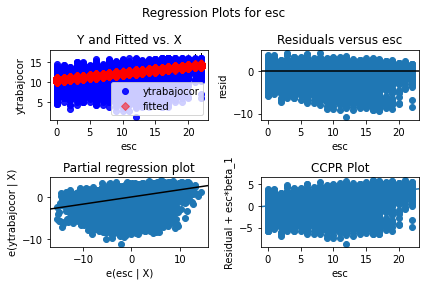

In [193]:
fig = sm.graphics.plot_regress_exog(results, "esc")
fig.tight_layout(pad=1.0)

Ejemplo caso con menos ruido: ejemplo de juguete

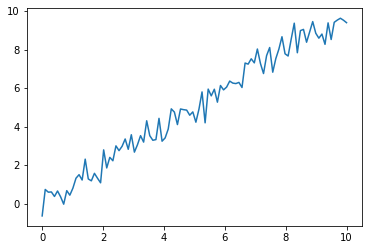

In [162]:
x = np.linspace(0, 10, 100)
y = x + 0.5 * np.random.normal(size=len(x))

plt.plot(x,y)

In [178]:
X = np.column_stack((x, x**2))
X = sm.add_constant(X)
res = sm.OLS(y, X).fit()

In [180]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     1807.
Date:                Mon, 26 Jul 2021   Prob (F-statistic):           1.73e-77
Time:                        23:31:42   Log-Likelihood:                -66.869
No. Observations:                 100   AIC:                             139.7
Df Residuals:                      97   BIC:                             147.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0904      0.141     -0.641      0.5

In [184]:
# y_hat = res.params[0] + results.params[1] * x + results.params[1] * x**2
res.params[2]

-0.009817635455210468

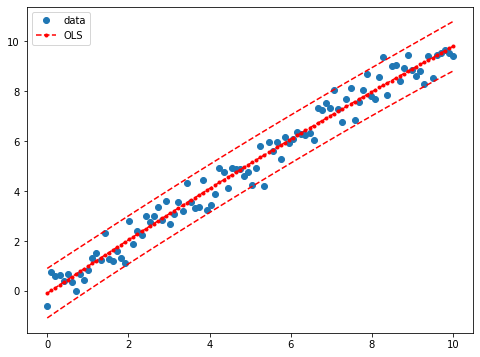

In [172]:
prstd, iv_l, iv_u = wls_prediction_std(res)
#Retorno: 
#-standard error of prediction same length as rows of exog
#-lower und upper confidence bounds

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(x, y, 'o', label="data")
ax.plot(x, res.fittedvalues, 'r--.', label="OLS")
ax.plot(x, iv_u, 'r--')
ax.plot(x, iv_l, 'r--')
ax.legend(loc='best');

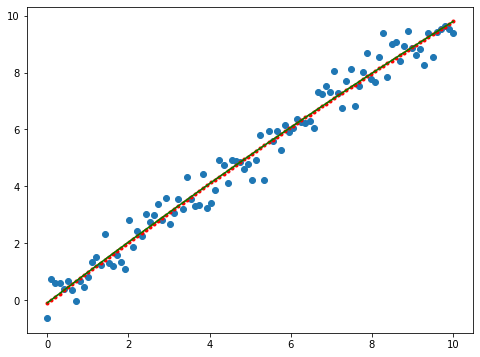

In [188]:
fig, ax = plt.subplots(figsize=(8,6))

y_hat = res.params[0] + res.params[1] * x + res.params[2] * x**2

ax.plot(x, y, 'o', label="data")
ax.plot(x, res.fittedvalues, 'r--.', label="OLS")
ax.plot(x, y_hat, 'g', label="OLS")

## Modelo Autorregresivo (AR)
Podemos estimar un modelo del tipo $Y_t = \beta_0 + \beta_1 Y_{t-1} + \mu_t$

En python podemos utilizar `AutoReg`: https://www.statsmodels.org/stable/examples/notebooks/generated/autoregressions.html

In [202]:
df = pd.read_excel("/home/felix/Dropbox/Computational_Economics/Intro_python/Data_OLS_AR/pib.xlsx")
df.dtypes
df.head()

,Periodo,PIB
0,1986-01-01,7899.666547
1,1986-04-01,8220.056395
2,1986-07-01,8355.276664
3,1986-10-01,8555.927503
4,1987-01-01,8626.993492


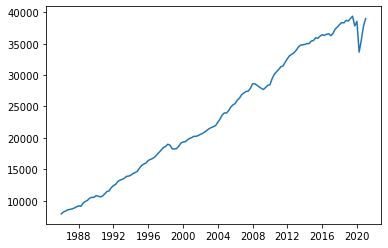

In [204]:
plt.plot(df.Periodo, df.PIB);

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

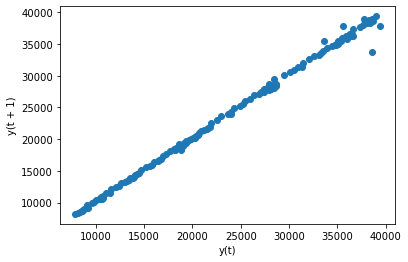

In [218]:
from pandas.plotting import lag_plot
lag_plot(df.PIB)

In [205]:
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from statsmodels.tsa.api import acf, pacf, graphics

In [207]:
mod = AutoReg(df.PIB, 1, old_names=False)
res = mod.fit()
print(res.summary())

                            AutoReg Model Results                             
Dep. Variable:                    PIB   No. Observations:                  141
Model:                     AutoReg(1)   Log Likelihood               -1085.062
Method:               Conditional MLE   S.D. of innovations            562.000
Date:                Tue, 27 Jul 2021   AIC                             12.706
Time:                        08:19:50   BIC                             12.769
Sample:                             1   HQIC                            12.731
                                  141                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        257.5324    123.602      2.084      0.037      15.278     499.787
PIB.L1         0.9985      0.005    203.603      0.000       0.989       1.008
                                    Roots           

Podemos actualizar el modelo a $Y_t = \beta_0 + \beta_1 Y_{t-1} + \beta_2 Y_{t-2} + \beta_3 Y_{t-3} + \beta_4 Y_{t-4} + \beta_5 Y_{t-5} + \mu_t$

In [209]:
mod = AutoReg(df.PIB, 5, old_names=False)
res = mod.fit()
print(res.summary())

                            AutoReg Model Results                             
Dep. Variable:                    PIB   No. Observations:                  141
Model:                     AutoReg(5)   Log Likelihood               -1047.475
Method:               Conditional MLE   S.D. of innovations            535.438
Date:                Tue, 27 Jul 2021   AIC                             12.669
Time:                        08:21:12   BIC                             12.819
Sample:                             5   HQIC                            12.730
                                  141                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        423.0718    133.111      3.178      0.001     162.179     683.965
PIB.L1         0.8942      0.083     10.802      0.000       0.732       1.056
PIB.L2         0.2591      0.123      2.105      0.0

Para un resumen de la visualización de los residuos estandarizados podemos ocupar `plot_diagnostics`

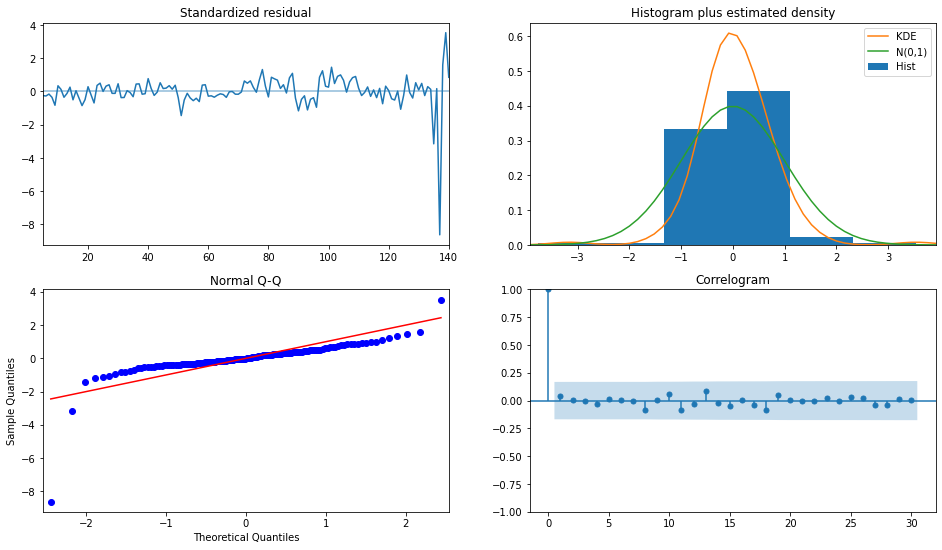

In [219]:
fig = plt.figure(figsize=(16,9))
fig = res.plot_diagnostics(fig=fig, lags=30)
#Standarized residual: 
    #-residuo: Valor observado - valor predicho
    #-standarized residual: residuo normalizado por el error estandar del modelo (RSE)
#Histogram plus: estima la distribución de los residuos estandarizados. Nos muestra la distribución normal (línea verde) como punto de comparación. 
#Normal Q-Q : muestra si el residuo está distribuido normalmente. Lo que se espera es que los puntos se encuentren sobre la línea roja o cercanos a ella. 
#Correlograma: nos muestra un gráfico de autocorrelaciones

Autocorrelaciones: https://www.statsmodels.org/stable/generated/statsmodels.graphics.tsaplots.plot_acf.html


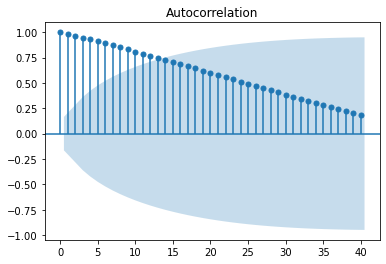

In [220]:
sm.graphics.tsa.plot_acf(df.PIB, lags=40)
plt.show()

## Actividad

1. Estime la ecuación de mincer: $Ingreso_i = \beta_0 + \beta_1 esc_i + \beta_2 exp_i + \beta_3 exp_i^2 + \beta_4 sexo_i + \mu_i$ donde : 
    - ingreso: log(ingreso del trabajo)
    - esc: escolaridad
    - exp: experiencia = edad - escolaridad
    - exp2: expediencia al cuadrado
    - sexo: variable dicotómica si es hombre (0) o mujer (1). 
2. Estime un modelo AR del tipo $\Delta y_t = \Delta y_{t-1}$ donde: 
    - $y_t$ es el PIB trimestral en el periodo t. 
    - $\Delta y_t$ es la variación del PIB trimestral en el periodo t. 
    - $\Delta y_{t-1}$ es la variación del PIB trimestral en el periodo t-1.     